<a href="https://colab.research.google.com/github/ysforgithub/steel_defects_detection_classification/blob/master/steel_defects_feature_eng_data_pre_prepare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Data source of this notebook is based on https://www.kaggle.com/c/severstal-steel-defect-detection/data**

# 1. Get access to the google drive by mount this notebook into the google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 2. Change the working directory to the target folder 

In [3]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/kaggle/steel defect')
# print out the current working directory
cwd = os.getcwd()
print(cwd)

/content/drive/My Drive/Colab Notebooks/kaggle/steel defect


# 3. This section is to create a new df contains three columns: the image Id, the image class Id and the encoded_pixels  

In [4]:
import pandas as pd
train_X=pd.read_csv("train.csv")
# get the idea of how many features and feature title
print (train_X.head(10))
# print out the image example1's class Id and image Id 
print ('the image1 class ID:',int(train_X['ImageId_ClassId'][0][-1]))
print ('the image1 ID:',train_X['ImageId_ClassId'][0][:-6])
# print out the image example2's class Id and image ID 
print ('the image2 class ID:',int(train_X['ImageId_ClassId'][4][-1]))
print ('the image2 class ID:',train_X['ImageId_ClassId'][4][:-6])

   ImageId_ClassId                                      EncodedPixels
0  0002cc93b.jpg_1  29102 12 29346 24 29602 24 29858 24 30114 24 3...
1  0002cc93b.jpg_2                                                NaN
2  0002cc93b.jpg_3                                                NaN
3  0002cc93b.jpg_4                                                NaN
4  00031f466.jpg_1                                                NaN
5  00031f466.jpg_2                                                NaN
6  00031f466.jpg_3                                                NaN
7  00031f466.jpg_4                                                NaN
8  000418bfc.jpg_1                                                NaN
9  000418bfc.jpg_2                                                NaN
the image1 class ID: 1
the image1 ID: 0002cc93b
the image2 class ID: 1
the image2 class ID: 00031f466


In [5]:
# Print out the top 5 rows of the train_X
train_X.head()

,ImageId_ClassId,EncodedPixels
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg_2,NaN
2,0002cc93b.jpg_3,NaN
3,0002cc93b.jpg_4,NaN
4,00031f466.jpg_1,NaN


In [6]:
# Showing the records whose EncodePixels column is not null indicates the record is defected. 
train_X[pd.notnull(train_X['EncodedPixels'])]

,ImageId_ClassId,EncodedPixels
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
18,0007a71bf.jpg_3,18661 28 18863 82 19091 110 19347 110 19603 11...
20,000a4bcdd.jpg_1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
27,000f6bf48.jpg_4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
30,0014fce06.jpg_3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...
50242,ffcf72ecf.jpg_3,121911 34 122167 101 122422 169 122678 203 122...
50258,fff02e9c5.jpg_3,207523 3 207777 9 208030 15 208283 22 208537 2...
50262,fffe98443.jpg_3,105929 5 106177 14 106424 24 106672 33 106923 ...
50266,ffff4eaa8.jpg_3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [7]:
# There are 7095 records which encodedePixels column is not null 
train_X[pd.notna(train_X['EncodedPixels'])].count()

ImageId_ClassId    7095
EncodedPixels      7095
dtype: int64

# 4. To Split the Imange Id from the class Id 
Assign 3 column names(ImageId,ClassId,EncodedPixels) to the new created dataframe 

In [8]:
# Define a new dataframe which has 3 columns: Imange ID, Class ID, Image's EncodedPixels
new_X = pd.DataFrame(columns=['ImageId','ClassId','EncodedPixels'])
new_X.head()

,ImageId,ClassId,EncodedPixels


# Define 3 functions:
*   Function1: split the class ID from the record's ImageId_ClassID column: the last digit after the sign of "_"
*   Function2: split the image's name with image ID from the record's image name
*   Function3: Copy the encodedPixels column to the new df

In [0]:
#Function 1 
def classId_split(row):
  # isinstance(target,str/float/int), check the target object dtype,if the record's encodedPixels column has no valid string contents then 
  # then the image has no defect, so define this non-defect image with class 0 
  if (isinstance(row['EncodedPixels'],str)): 
    classid=int(row['ImageId_ClassId'][-1])
  else:
    classid=0
  return classid
#Function 2
def imageId_split(row):
  imageid=row['ImageId_ClassId'][:-2]
  return imageid
#Function 3 
def Encoded_Pixels(row):
  encoded_pixels = row['EncodedPixels']
  return encoded_pixels

# Apply the 3 defined functions above to the the Train_X dataframe, print out the top 20 rows of the new dataframe 

In [0]:
# Apply the three functions to the each of the records then update the new defined df with classId, imageId, and EncodedPixels if available
new_X['ClassId']=train_X.apply(lambda row: classId_split(row), axis=1)
new_X['ImageId']=train_X.apply(lambda row: imageId_split(row), axis=1)
new_X['EncodedPixels']= train_X.apply(lambda row: Encoded_Pixels(row),axis=1)

In [11]:
# Showing the first 20 rows of the new defined df with 3 columns 
new_X.head(20)

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg,0,NaN
2,0002cc93b.jpg,0,NaN
3,0002cc93b.jpg,0,NaN
4,00031f466.jpg,0,NaN
5,00031f466.jpg,0,NaN
6,00031f466.jpg,0,NaN
7,00031f466.jpg,0,NaN
8,000418bfc.jpg,0,NaN
9,000418bfc.jpg,0,NaN


#5. Drop the duplicate records for the new df, define a new_train_x df

In [12]:
#remove the duplicate records from the new_x df
new_train_x=new_X.drop_duplicates()
# define a new list that contains the defected images' ID
defect_ids=  new_train_x[new_train_x['ClassId']!=0]['ImageId']
print ('The defected images count:',len(defect_ids))
# show up the first 20 records of the non-duplicate dataframe 
new_train_x.head(20)

The defected images count: 7095


,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg,0,NaN
4,00031f466.jpg,0,NaN
8,000418bfc.jpg,0,NaN
12,000789191.jpg,0,NaN
16,0007a71bf.jpg,0,NaN
18,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
20,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
21,000a4bcdd.jpg,0,NaN
24,000f6bf48.jpg,0,NaN


# 6. Create a new column "Is_defected" to label if the record is defected. 

In [13]:
# define a function: label True if the record is defected, label False if the record is non-defected. 
def defect_id(row):
  if row['ImageId'] in defect_ids.tolist():
    return True
  else: 
    return False
# apply the function for each record then return the defected label to the new defined column with True or False 
new_X['Is_defected']= new_X.apply(lambda row: defect_id(row),axis=1)
new_train_x['Is_defected']= new_train_x.apply(lambda row: defect_id(row),axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
#show up the first 5 recodes with new defined column 
new_X.head()

,ImageId,ClassId,EncodedPixels,Is_defected
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,True
1,0002cc93b.jpg,0,NaN,True
2,0002cc93b.jpg,0,NaN,True
3,0002cc93b.jpg,0,NaN,True
4,00031f466.jpg,0,NaN,False


In [15]:
#show up the first 5 recodes with new defined column 
new_train_x.head()

,ImageId,ClassId,EncodedPixels,Is_defected
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,True
1,0002cc93b.jpg,0,NaN,True
4,00031f466.jpg,0,NaN,False
8,000418bfc.jpg,0,NaN,False
12,000789191.jpg,0,NaN,False


In [16]:
print ('The counts of the new_train_x:',len(new_train_x))
new_train_x['ImageId'][1:].nunique()

The counts of the new_train_x: 19663


12568

In [17]:
# create a df with unique records 
x_train_unique = new_train_x[(new_train_x['Is_defected']==True) & (new_train_x['ClassId']!=0) | (new_train_x['Is_defected']==False)]
print ('The unique records from x_train_unique count:',len(x_train_unique))
print ('The new_train_x count:',len(new_train_x))
x_train_unique.head(5)

The unique records from x_train_unique count: 12997
The new_train_x count: 19663


,ImageId,ClassId,EncodedPixels,Is_defected
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,True
4,00031f466.jpg,0,NaN,False
8,000418bfc.jpg,0,NaN,False
12,000789191.jpg,0,NaN,False
18,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...,True


*The unique image ID from new_train_x df is **12568** but the unique records from new_train_unique is **12997**. That means: some of the records have the same imageId but different ClassId.*

# 7. Reset the index of x_train_unique df, print out the top 5 records. 

In [18]:
x_train_unique=x_train_unique.reset_index()
del x_train_unique['index']
#del x_train_unique['level_0']
x_train_unique.head()

,ImageId,ClassId,EncodedPixels,Is_defected
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,True
1,00031f466.jpg,0,NaN,False
2,000418bfc.jpg,0,NaN,False
3,000789191.jpg,0,NaN,False
4,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...,True


In [0]:
image_path=cwd+'/train_images'
list = os.listdir(image_path)
len(list)




# 8. This section will use train_X['EncodedPixels'][0] as an example to decode the encoded pixels.

In [19]:
# split the string based on the space 
print (type(train_X['EncodedPixels'][0].split()))
splited_string = train_X['EncodedPixels'][0].split()
print (splited_string[0],type(splited_string[0]),splited_string[1])
# output a list of encoded pixels 
result = [int(i) for i in splited_string]
print (result)

<class 'list'>
29102 <class 'str'> 12
[29102, 12, 29346, 24, 29602, 24, 29858, 24, 30114, 24, 30370, 24, 30626, 24, 30882, 24, 31139, 23, 31395, 23, 31651, 23, 31907, 23, 32163, 23, 32419, 23, 32675, 23, 77918, 27, 78174, 55, 78429, 60, 78685, 64, 78941, 68, 79197, 72, 79452, 77, 79708, 81, 79964, 85, 80220, 89, 80475, 94, 80731, 98, 80987, 102, 81242, 105, 81498, 105, 81754, 104, 82010, 104, 82265, 105, 82521, 31, 82556, 69, 82779, 27, 82818, 63, 83038, 22, 83080, 57, 83297, 17, 83342, 50, 83555, 13, 83604, 44, 83814, 8, 83866, 37, 84073, 3, 84128, 31, 84390, 25, 84652, 18, 84918, 8, 85239, 10, 85476, 29, 85714, 47, 85960, 57, 86216, 57, 86471, 58, 86727, 58, 86983, 58, 87238, 59, 87494, 59, 87750, 59, 88005, 60, 88261, 60, 88517, 60, 88772, 61, 89028, 53, 89283, 40, 89539, 32, 89667, 10, 89795, 30, 89923, 28, 90050, 29, 90179, 37, 90306, 27, 90434, 38, 90562, 14, 90690, 38, 90817, 9, 90946, 38, 91073, 3, 91202, 38, 91458, 38, 91714, 38, 91969, 39, 92225, 39, 92481, 39, 92737, 39, 929

Based on the example above, 
* split the string with space 
* convert the splited to string to int 

In [20]:
# define a function to convert string to a list of int
def convert_to_listInt(string):
  li = string.split()
  result = [int(i) for i in li]
  return result 
print (result,len(result))

[29102, 12, 29346, 24, 29602, 24, 29858, 24, 30114, 24, 30370, 24, 30626, 24, 30882, 24, 31139, 23, 31395, 23, 31651, 23, 31907, 23, 32163, 23, 32419, 23, 32675, 23, 77918, 27, 78174, 55, 78429, 60, 78685, 64, 78941, 68, 79197, 72, 79452, 77, 79708, 81, 79964, 85, 80220, 89, 80475, 94, 80731, 98, 80987, 102, 81242, 105, 81498, 105, 81754, 104, 82010, 104, 82265, 105, 82521, 31, 82556, 69, 82779, 27, 82818, 63, 83038, 22, 83080, 57, 83297, 17, 83342, 50, 83555, 13, 83604, 44, 83814, 8, 83866, 37, 84073, 3, 84128, 31, 84390, 25, 84652, 18, 84918, 8, 85239, 10, 85476, 29, 85714, 47, 85960, 57, 86216, 57, 86471, 58, 86727, 58, 86983, 58, 87238, 59, 87494, 59, 87750, 59, 88005, 60, 88261, 60, 88517, 60, 88772, 61, 89028, 53, 89283, 40, 89539, 32, 89667, 10, 89795, 30, 89923, 28, 90050, 29, 90179, 37, 90306, 27, 90434, 38, 90562, 14, 90690, 38, 90817, 9, 90946, 38, 91073, 3, 91202, 38, 91458, 38, 91714, 38, 91969, 39, 92225, 39, 92481, 39, 92737, 39, 92993, 39, 93248, 40, 93504, 40, 93760, 4

In [21]:
# convert the encoded list to a complete pixels list 
def convert_to_full_pixels_list(result):
  list =[]
  for i in range(len(result)):
    if i%2 == 0:
      list.append(result[i])
    else:
      for j in range(1,result[i]):
        list.append(result[i-1]+j)
  return list
complete_pixels_list=convert_to_full_pixels_list(result)
print (complete_pixels_list)
len(complete_pixels_list)

[29102, 29103, 29104, 29105, 29106, 29107, 29108, 29109, 29110, 29111, 29112, 29113, 29346, 29347, 29348, 29349, 29350, 29351, 29352, 29353, 29354, 29355, 29356, 29357, 29358, 29359, 29360, 29361, 29362, 29363, 29364, 29365, 29366, 29367, 29368, 29369, 29602, 29603, 29604, 29605, 29606, 29607, 29608, 29609, 29610, 29611, 29612, 29613, 29614, 29615, 29616, 29617, 29618, 29619, 29620, 29621, 29622, 29623, 29624, 29625, 29858, 29859, 29860, 29861, 29862, 29863, 29864, 29865, 29866, 29867, 29868, 29869, 29870, 29871, 29872, 29873, 29874, 29875, 29876, 29877, 29878, 29879, 29880, 29881, 30114, 30115, 30116, 30117, 30118, 30119, 30120, 30121, 30122, 30123, 30124, 30125, 30126, 30127, 30128, 30129, 30130, 30131, 30132, 30133, 30134, 30135, 30136, 30137, 30370, 30371, 30372, 30373, 30374, 30375, 30376, 30377, 30378, 30379, 30380, 30381, 30382, 30383, 30384, 30385, 30386, 30387, 30388, 30389, 30390, 30391, 30392, 30393, 30626, 30627, 30628, 30629, 30630, 30631, 30632, 30633, 30634, 30635, 30636

4396

*# Based on the three seperate functions above, we can create a intergrated function called encodedpixels_to_completepixels to convert one record of encodedPixels to a list of decoded Pixels* 


In [0]:
# convert the string of encoded pixels to a list to complete pixels
def encodedpixels_to_completepixels(row):
  if (isinstance(row['EncodedPixels'],str)):
    li = row['EncodedPixels'].split()
    result= [int(i) for i in li]
    list = []
    for i in range(len(result)):
      if i%2 ==0:
        list.append(result[i])
      else:
        for j in range(1, result[i]):
          list.append(result[i-1]+j)
    return list
  else:
    pass
#encodedpixels_to_completepixels(train_X['EncodedPixels'][0])[0:4]


In [23]:
# run the encodedepixels to completepixels to an example 
print (encodedpixels_to_completepixels(train_X.iloc[0,:]))
print ("The dtype of the element from the converted resutl: ",type(encodedpixels_to_completepixels(train_X.iloc[0,:])[0]))

[29102, 29103, 29104, 29105, 29106, 29107, 29108, 29109, 29110, 29111, 29112, 29113, 29346, 29347, 29348, 29349, 29350, 29351, 29352, 29353, 29354, 29355, 29356, 29357, 29358, 29359, 29360, 29361, 29362, 29363, 29364, 29365, 29366, 29367, 29368, 29369, 29602, 29603, 29604, 29605, 29606, 29607, 29608, 29609, 29610, 29611, 29612, 29613, 29614, 29615, 29616, 29617, 29618, 29619, 29620, 29621, 29622, 29623, 29624, 29625, 29858, 29859, 29860, 29861, 29862, 29863, 29864, 29865, 29866, 29867, 29868, 29869, 29870, 29871, 29872, 29873, 29874, 29875, 29876, 29877, 29878, 29879, 29880, 29881, 30114, 30115, 30116, 30117, 30118, 30119, 30120, 30121, 30122, 30123, 30124, 30125, 30126, 30127, 30128, 30129, 30130, 30131, 30132, 30133, 30134, 30135, 30136, 30137, 30370, 30371, 30372, 30373, 30374, 30375, 30376, 30377, 30378, 30379, 30380, 30381, 30382, 30383, 30384, 30385, 30386, 30387, 30388, 30389, 30390, 30391, 30392, 30393, 30626, 30627, 30628, 30629, 30630, 30631, 30632, 30633, 30634, 30635, 30636

*# create a column called completePixels, the complete pixels are calculated by applying the encodedpixels_to_completepixels against each record of x_train_unique* 


In [24]:
# create a column called completePixels, the complete pixels are calculated by applying the encodedpixels_to_completepixels against each record of x_train_unique 
x_train_unique['CompletePixels']=x_train_unique.apply(lambda row: encodedpixels_to_completepixels(row),axis=1)
x_train_unique.head()

,ImageId,ClassId,EncodedPixels,Is_defected,CompletePixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,True,"[29102, 29103, 29104, 29105, 29106, 29107, 291..."
1,00031f466.jpg,0,NaN,False,None
2,000418bfc.jpg,0,NaN,False,None
3,000789191.jpg,0,NaN,False,None
4,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...,True,"[18661, 18662, 18663, 18664, 18665, 18666, 186..."


In [25]:
# Drop the encodedPixels and keep the complete pixels instead 
x_train_completepixels = x_train_unique.drop(columns=['EncodedPixels'])
x_train_completepixels.head()

,ImageId,ClassId,Is_defected,CompletePixels
0,0002cc93b.jpg,1,True,"[29102, 29103, 29104, 29105, 29106, 29107, 291..."
1,00031f466.jpg,0,False,None
2,000418bfc.jpg,0,False,None
3,000789191.jpg,0,False,None
4,0007a71bf.jpg,3,True,"[18661, 18662, 18663, 18664, 18665, 18666, 186..."


In [26]:
print (type(x_train_completepixels['CompletePixels'][0]))
print (type(x_train_completepixels['CompletePixels'][0][0]))
x_train_completepixels['CompletePixels'][0][0]

<class 'list'>
<class 'int'>


29102

In [0]:
#del x_train_unique

# 9. Create directoris for train images, prepare to catogorize imanges based on the ClassId. 

In [0]:
image_path = os.getcwd()

*# Split the training set images into two different sets: one for training, the other for validation*  
The trainset size is 80%. The validationset size is 20%. 

In [28]:
from sklearn.model_selection import train_test_split
x_train_ready, x_validation= train_test_split(x_train_completepixels, test_size=0.2,random_state=42)
print(len(x_train_ready),len(x_validation))

10397 2600


In [29]:
x_train_ready.head()

,ImageId,ClassId,Is_defected,CompletePixels
1576,1e9aec741.jpg,3,True,"[141018, 141019, 141020, 141021, 141022, 14102..."
11830,e869118bb.jpg,3,True,"[154113, 154114, 154115, 154116, 154117, 15411..."
6064,76a7e1815.jpg,3,True,"[160790, 160791, 160792, 160793, 161045, 16104..."
12217,f00c6d4b2.jpg,0,False,None
3881,4ca64717c.jpg,3,True,"[24767, 24768, 25021, 25022, 25023, 25024, 250..."


In [30]:
x_validation.head()

,ImageId,ClassId,Is_defected,CompletePixels
10377,cbe5423d0.jpg,0,False,None
11971,eb1f38f03.jpg,3,True,"[51671, 51672, 51673, 51674, 51923, 51924, 519..."
5927,7435bcc25.jpg,3,True,"[6081, 6082, 6083, 6084, 6085, 6086, 6087, 608..."
10097,c646462b5.jpg,3,True,"[236442, 236443, 236444, 236445, 236446, 23644..."
5013,62e5f5e95.jpg,0,False,None


In [0]:
# Save the x_train_ready dataframe(80% of the total train images) as csv file for the future use  
x_train_ready.to_csv(image_path+'/80%_train_images'+'/80%_train_images_completePixels.csv')

In [33]:
# check if a file or a directory exists, if not then create folders for each class
from os import path

if path.exists(image_path+'/80%_train_images'+'/Class_0'):
  print (image_path+'/80%_train_images'+'/Class_0 is there')
else:
  os.mkdir(image_path+'/80%_train_images'+'/Class_0')
  
if path.exists(image_path+'/80%_train_images'+'/Class_1'):
  print (image_path+'/80%_train_images'+'/Class_1 is there')
else:
  os.mkdir(image_path+'/80%_train_images'+'/Class_1')
  
if path.exists(image_path+'/80%_train_images'+'/Class_2'):
  print (image_path+'/80%_train_images'+'/Class_2 is there')
else:
  os.mkdir(image_path+'/80%_train_images'+'/Class_2')
  
if path.exists(image_path+'/80%_train_images'+'/Class_3'):
  print (image_path+'/80%_train_images'+'/Class_3 is there')
else:
  os.mkdir(image_path+'/80%_train_images'+'/Class_3')
  
if path.exists(image_path+'/80%_train_images'+'/Class_4'):
  print (image_path+'/80%_train_images'+'/Class_4 is there')
else:
  os.mkdir(image_path+'/80%_train_images'+'/Class_4')

# To confirm the five different folders created for 5 classes of images 
os.listdir(os.getcwd()+'/80%_train_images')

['customer_1.tfrecord',
 '80%_train_images_label_map.json',
 '80%_train_images_completePixels.csv',
 'Class_0',
 'Class_1',
 'Class_2',
 'Class_3',
 'Class_4']

In [0]:
# make classes folder for validation images
from os import path

if path.exists(image_path+'/validation_images'+'/Class_0'):
  print (image_path+'/validation_images'+'/Class_0 is there')
else:
  os.mkdir(image_path+'/validation_images'+'/Class_0')
  
if path.exists(image_path+'/validation_images'+'/Class_1'):
  print (image_path+'/validation_images'+'/Class_1 is there')
else:
  os.mkdir(image_path+'/validation_images'+'/Class_1')
  
if path.exists(image_path+'/validation_images'+'/Class_2'):
  print (image_path+'/validation_images'+'/Class_2 is there')
else:
  os.mkdir(image_path+'/validation_images'+'/Class_2')
  
if path.exists(image_path+'/validation_images'+'/Class_3'):
  print (image_path+'/validation_images'+'/Class_3 is there')
else:
  os.mkdir(image_path+'/validation_images'+'/Class_3')
  
if path.exists(image_path+'/validation_images'+'/Class_4'):
  print (image_path+'/validation_images'+'/Class_4 is there')
else:
  os.mkdir(image_path+'/validation_images'+'/Class_4')

In [0]:
# Save the x_validation dataframe(80% of the total train images) as csv file for the future use  
x_validation.to_csv(image_path+'/validation_images'+'/validation_images_completePixels.csv')

*The following is to define a function to parse the images from x_train_ready CSV*


1.   If the classId is 0, then means no defect, just copy the image to the class_0 folder 
2.   If the classId is not 0, then based on the classId of the image, paint the color on the defected mark. **class 1, class 2, class 3 and class 4, RGB color code is [[255,51,51],[255,255,51],[51,255,51],[51,153,255]].**
Then copy the painted images to the corresponding image class folder. 








In [0]:
'''
# Just in case need to import the two csv files,for any future use of the 80% train imanges and 20% validation images 
import pandas as pd 

x_train_ready=pd.read_csv(image_path+'/80%_train_images'+'/80%_train_images_completePixels.csv')
x_validation=pd.read_csv(image_path+'/validation_images'+'/validation_images_completePixels.csv')

In [0]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os 
from shutil import copyfile
import imageio
import numpy as np

image_path = os.getcwd()

def pass_images_to_classes(row):
  imageId=row['ImageId']
  classId=row['ClassId']
  isDefected = row['Is_defected']
  colorline = [[255,51,51],[255,255,51],[51,255,51],[51,153,255]]
  if isDefected == False:
    copyfile(image_path+'/train_images/'+imageId,image_path+'/80%_train_images'+'/Class_'+str(classId)+'/'+imageId)
  if isDefected==True:
    imgarray=mpimg.imread(image_path+'/train_images/'+imageId)
    img_2d=imgarray.reshape(256*1600,3,order='F')
    tmp_copy=np.copy(img_2d)
    row['CompletePixels']=[x-1 for x in row['CompletePixels']]
    tmp_copy[row['CompletePixels']]=colorline[classId-1]
    tmp_copy=tmp_copy.reshape(256,1600,3,order='F')
    imageio.imwrite(image_path+'/80%_train_images'+'/Class_'+str(classId)+'/'+imageId, tmp_copy)
    del tmp_copy
    del imgarray
    del img_2d

**Function with lambda: apply the pass_images_classes(defined above) against each record of the x_train_ready csv(80% training images).**
**The pre-processing images are pro-processed with the defect marks with different colors based on the defect-class-IDs.**

In [34]:
x_train_ready.apply(lambda row:pass_images_to_classes(row),axis=1)

1576     None
11830    None
6064     None
12217    None
3881     None
         ... 
11964    None
5191     None
5390     None
860      None
7270     None
Length: 10397, dtype: object

*A quick check to confirm the total images is equal to the total records from x_train_ready CSV*

In [49]:
image_path=os.getcwd()+'/80%_train_images'
print ("class_0 total:",len(os.listdir(image_path+'/Class_0')))
print ("class_1 total:",len(os.listdir(image_path+'/Class_1')))
print ("class_2 total:",len(os.listdir(image_path+'/Class_2')))
print ("class_3 total:",len(os.listdir(image_path+'/Class_3')))
print ("class_4 total:",len(os.listdir(image_path+'/Class_4')))
print ("class_0+class_1+class_2+class_3+class_4:",len(os.listdir(image_path+'/Class_0'))+len(os.listdir(image_path+'/Class_1'))+len(os.listdir(image_path+'/Class_2'))+len(os.listdir(image_path+'/Class_3'))+len(os.listdir(image_path+'/Class_4')))
print ('The total records of x_train_ready',len(x_train_ready))

class_0 total: 4669
class_1 total: 727
class_2 total: 187
class_3 total: 4163
class_4 total: 651
class_0+class_1+class_2+class_3+class_4: 10397
The total records of x_train_ready 10397


*The following is to define a function to parse the images of x_validation CSV*


1.   If the classId is 0, then means no defect, just copy the image to the class_0 folder 
2.   If the classId is not 0, then based on the classId of the image, paint the color on the defected mark. **class 1, class 2, class 3 and class 4, RGB color code is [[255,51,51],[255,255,51],[51,255,51],[51,153,255]].**
Then copy the painted images to the corresponding image class folder. 

In [0]:
# category each class of images for validation images 
def pass_validation_images_to_classes(row):
  imageId=row['ImageId']
  classId=row['ClassId']
  isDefected = row['Is_defected']
  colorline = [[255,51,51],[255,255,51],[51,255,51],[51,153,255]]
  if isDefected == False:
    copyfile(image_path+'/train_images/'+imageId,image_path+'/validation_images'+'/Class_'+str(classId)+'/'+imageId)
  if isDefected==True:
    imgarray=mpimg.imread(image_path+'/train_images/'+imageId)
    img_2d=imgarray.reshape(256*1600,3,order='F')
    tmp_copy=np.copy(img_2d)
    row['CompletePixels']=[x-1 for x in row['CompletePixels']]
    tmp_copy[row['CompletePixels']]=colorline[classId-1]
    tmp_copy=tmp_copy.reshape(256,1600,3,order='F')
    imageio.imwrite(image_path+'/validation_images'+'/Class_'+str(classId)+'/'+imageId, tmp_copy)
    del tmp_copy
    del imgarray
    del img_2d

**Function with lambda: apply the pass_validation_images_classes(defined above) against each record of the x_validation csv(80% training images).**
**The pre-processing images are pro-processed with the defect marks with different colors based on the defect-class-IDs.**

In [37]:
# save each class of images to the folder. 
x_validation.apply(lambda row: pass_validation_images_to_classes(row),axis=1)
'''
import shutil
import os, glob
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/kaggle/steel defect/validation_images/*.jpg'):
    shutil.move(filename,'/content/drive/My Drive/Colab Notebooks/kaggle/steel defect/validation_images/original_validation_images') 
'''

"\nimport shutil\nimport os, glob\nfor filename in glob.glob('/content/drive/My Drive/Colab Notebooks/kaggle/steel defect/validation_images/*.jpg'):\n    shutil.move(filename,'/content/drive/My Drive/Colab Notebooks/kaggle/steel defect/validation_images/original_validation_images') \n"

# The following part cells are pratices about adding the defect masks on the images based on decoded defects pixels with a different color. 

In [0]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np 

image_path = os.getcwd
img = mpimg.imread(image_path+'/train_images/12c0b2b5c.jpg')
#print(img)
plt.imshow(img)
img.shape[0],img.shape[1]
img_2d=img.reshape(256*1600,3,order='F')
img_2d[256*1600-1,:]

In [0]:

img_2d=img.reshape(256*1600,3,order='F')
tmp_copy = np.copy(img_2d)
print (tmp_copy.flags)
tmp_copy[x_train_completepixels['CompletePixels'][7]]=[0,120,215]
tmp_copy=tmp_copy.reshape(256,1600,3,order='F')

import imageio
imageio.imwrite(image_path+'/test.jpg', tmp_copy)
#plt.imshow(tmp_copy)
#tmp_copy=img_2d
#print (tmp_copy.flags)

In [0]:
mpimg.imsave(image_path+'/train_images/tmp_copy.jpg',tmp_copy)
xxxxx = mpimg.imread(image_path+'/train_images/tmp_copy.jpg')
plt.imshow(xxxxx)

In [0]:
img_2d=img.reshape(256*1600,3,order='F')
print (img_2d.shape)
print (type(img_2d))

practice the numpy array reshape 

In [0]:
import numpy as np 

ftmp=np.zeros((1600*256,3),dtype=int)
ftmp[x_train_completepixels['CompletePixels'][4]]=[0,120,215]
#tmp=img_2d

#tmp.setflags(write=True)
print (ftmp.flags)
ftmp=ftmp.reshape(256,1600,3,order='C')
print (ftmp.flags)

plt.imshow(ftmp)


In [0]:
x_train_completepixels['CompletePixels'][4]

In [0]:
np.put(img_2d,[x_train_completepixels['CompletePixels'][4],[0,120,215])

In [0]:
x_train_completepixels['CompletePixels'][4][0]

In [0]:
mask_image[x_train_completepixels['CompletePixels'][0]]=50
mask = mask_image.reshape(1600,256).T
plt.imshow(mask)

In [0]:
a = np.arange(6).reshape((3, 2))
a

In [0]:
b=a.reshape(2*3,order='C')
b

In [0]:
b=a.reshape(2*3,order='F')
b

In [0]:
b=a.reshape(2*3)
b

In [0]:
img_2d=img.reshape(256*1600,3,order='C')
print (img_2d.shape)
print (type(img_2d))

In [0]:
img[int(30114/1600),int(30114%1600)]

In [0]:
img_2d[30114]

In [0]:
tmp_copy_2d = tmp_copy.reshape(256*1600,3,order='C')
print (tmp_copy_2d[18661])
print (tmp_copy[int(18661/1600),int(18661%1600)])

In [0]:
print (29101%1600,29101/1600)

In [0]:
a=np.array([[[1,1,1],[2,2,2],[3,3,3]],[[4,4,4],[5,5,5],[6,6,6]]])
print (a.shape)
b=a.reshape(2*3,3,order='C')
print (b.shape)
b

In [0]:
m = 2
ax=int(m/3)
ay=int(m%3)
print (ax,ay)
print (a[ax,ay])
print (b[m])

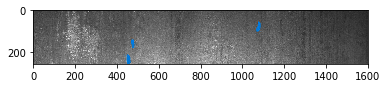

In [0]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np 

image_path = os.getcwd()
img = mpimg.imread(image_path+'/total_train_images_with_defected_mask/Class_1/0a4ad45a5.jpg')
#print(img)
plt.imshow(img)

In [0]:
img.shape

(256, 1600, 3)